In [377]:
%matplotlib inline

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Conclusion

1. As a result of the research, average tumor volume after using Capomulin is 40.675741, Ramicane 40.216745. 
   Capomuline and Ramicane have been performed to subject animal Capomulin:230 Ramicane:228 .
   We can say that Ramicane is more effective than Capomulin.
  


2. As a result of the research, we can say that the most ineffective medicines are Infubinol and Ceftamin. The biggest tumor volumes have been observed in the resulf of usage of this two medicane.

3. Once the body mess increases, the tumor volume increases as well. 

## Creating DataFrame: Clearing and Manupilating

1. Two given dataset have been handled and merged as one dataset.
2. One dataframe has been created as merge_lab.
3. Column Names has been manupilated.
4. Duplications have been removed.
5. NaN values have been removed.

In [379]:
lab_data1=pd.read_csv("Resources/Mouse_metadata.csv")   
lab_data2=pd.read_csv("Resources/Study_results.csv")

In [380]:
merge_lab=pd.merge(lab_data1,lab_data2,on=("Mouse ID"))
merge_lab.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [381]:
merge_lab=merge_lab.rename(columns={
    "Mouse ID":"Mouse_ID",
    "Drug Regimen":"Drug_Regimen",
    "Age_months":"Age_Months",
    "Weight (g)":"Weight",
    "Tumor Volume (mm3)":"Tumor_Volume",
    "Metastatic Sites":"Metastatic_Sites"
})
merge_lab.head()

,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [382]:
df=merge_lab.drop_duplicates()

In [383]:
df=df.dropna(how="any")

In [384]:
df.count()

Mouse_ID            1892
Drug_Regimen        1892
Sex                 1892
Age_Months          1892
Weight              1892
Timepoint           1892
Tumor_Volume        1892
Metastatic_Sites    1892
dtype: int64

## Summary Statistics Table : the tumor volume for each drug regimen

In [385]:
drug_regimen_summary=df[["Drug_Regimen","Tumor_Volume"]].groupby(["Drug_Regimen"]).agg({
    "Tumor_Volume":["mean","median","var","std","sem"]})
drug_regimen_summary


Tumor_Volume                                          
                     mean     median        var       std       sem
Drug_Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plotting: the total number of measurements taken for each treatment regimen

In [386]:
regimen_count=df[["Drug_Regimen","Mouse_ID"]].groupby(["Drug_Regimen"]).count()
regimen_count


,Mouse_ID
Drug_Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,160
Ramicane,228
Stelasyn,181


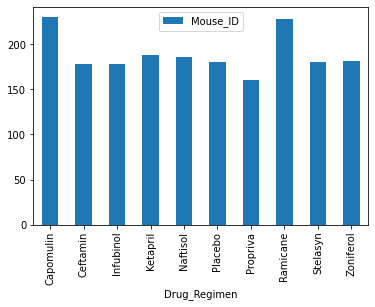

In [387]:
regimen_count.plot.bar()

## Pie Plotting: The Distribution of Female/Male Mice in the Study

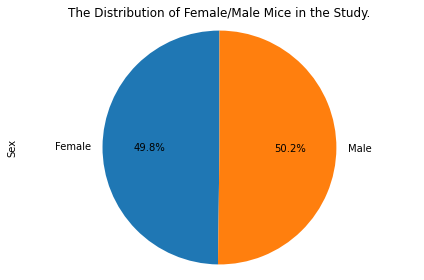

In [388]:
sex_groupby=df.groupby(["Sex"])
sex_count=sex_groupby["Mouse_ID"].nunique()

sex_plot=sex_count.plot(kind="pie",title="The Distribution of Female/Male Mice in the Study.",startangle=90,autopct="%1.1f%%")
sex_plot.set_ylabel("Sex")

plt.axis("equal")
plt.tight_layout()
plt.show()

## Calculating The Quartiles and IQR

In [389]:
df_regimen4=df.loc[(df["Drug_Regimen"]=="Capomulin")|
    (df["Drug_Regimen"]=="Ramicane")|
    (df["Drug_Regimen"]=="Infubinol")|
    (df["Drug_Regimen"]=="Ceftamin"),
    ["Mouse_ID","Drug_Regimen","Tumor_Volume"]].groupby(["Mouse_ID"]).tail(1)

def get_percentile(df_regimen4,percentile_rank):
    df_regimen4=df_regimen4.sort_values(by="Tumor_Volume").reset_index()
    
    index=(len(df_regimen4.index)-1)*percentile_rank/100.0
    index=int(index)
    
    return df_regimen4.at[index,"Tumor_Volume"]



In [390]:


df_iqr=pd.DataFrame({
    "q0":[get_percentile(df_regimen4,0)],
    "q1":[get_percentile(df_regimen4,25)],
    "median":[get_percentile(df_regimen4,50)],
    "q3":[get_percentile(df_regimen4,75)],
    "q4":[get_percentile(df_regimen4,100)],
    "IQR":[q3-q1]})

df_iqr=df_iqr.reset_index(drop=True)
df_iqr.head()

,q0,q1,median,q3,q4,IQR
0,22.050126,37.074024,45.0,59.851956,72.226731,22.777931


## Box and Whisker Plot 

the final tumor volume for Capomulin, Ramicane, Infubinol, and Ceftamin

In [391]:
df_regimen4=df.loc[(df["Drug_Regimen"]=="Capomulin")|
    (df["Drug_Regimen"]=="Ramicane")|
    (df["Drug_Regimen"]=="Infubinol")|
    (df["Drug_Regimen"]=="Ceftamin"),
    ["Mouse_ID","Drug_Regimen","Tumor_Volume"]].groupby(["Mouse_ID"]).tail(1)

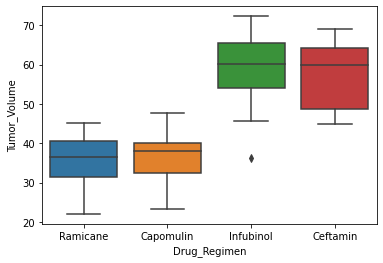

In [392]:
sns.boxplot(x="Drug_Regimen",y="Tumor_Volume",data=df_regimen4)

## Plotting Line

In [393]:
dt=df.loc[df["Drug_Regimen"]=="Capomulin",["Mouse_ID","Timepoint"]].groupby(["Mouse_ID"]).count()

In [394]:
dt.sort_values("Timepoint",ascending=False).head(5)

,Timepoint
Mouse_ID,
b128,10
b742,10
x401,10
w914,10
v923,10


In [395]:
dpline=df.loc[df["Mouse_ID"]=="b128",["Mouse_ID","Drug_Regimen","Timepoint","Tumor_Volume"]]
dpline

,Mouse_ID,Drug_Regimen,Timepoint,Tumor_Volume
300,b128,Capomulin,0,45.000000
301,b128,Capomulin,5,45.651331
302,b128,Capomulin,10,43.270852
303,b128,Capomulin,15,43.784893
304,b128,Capomulin,20,42.731552
305,b128,Capomulin,25,43.262145
306,b128,Capomulin,30,40.605335
307,b128,Capomulin,35,37.967644
308,b128,Capomulin,40,38.379726
309,b128,Capomulin,45,38.982878


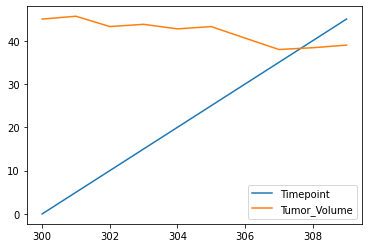

In [396]:
dpline.plot.line()

## Scatter Plot

1. Generating scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
2. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume      for the Capomulin treatment.
3. Plotted the linear regression model on top of the previous scatter plot.

In [397]:
dp=df.loc[df["Drug_Regimen"]=="Capomulin",["Mouse_ID","Weight","Tumor_Volume"]].groupby(["Mouse_ID"]).mean()


(14.0, 26.0)

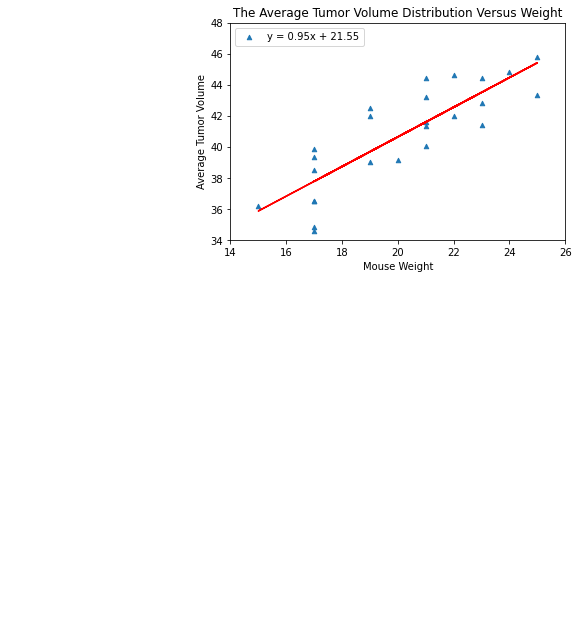

In [398]:
weight=dp["Weight"]
volume=dp["Tumor_Volume"]

dp.plot.scatter(x="Weight",y="Tumor_Volume",alpha=1,marker='^',label=line_eq)
plt.title("The Average Tumor Volume Distribution Versus Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.legend(loc="upper left")



(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.ylim(34, 48)
plt.xlim(14, 26)

In [399]:
weight=dp["Weight"]
volume=dp["Tumor_Volume"]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
